In [44]:
import os
import numpy as np
import ccgpack as ccg
import pylab as plt
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

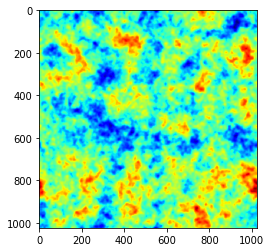

In [4]:
cl = np.load('../data/cl_planck_lensed.npy')
sfs = ccg.StochasticFieldSimulator(cl)

m = sfs.simulate(nside=1024,size=10)
plt.imshow(m,cmap=plt.cm.jet)

In [7]:
maps = []
for _ in range(100):
    maps.append(sfs.simulate(nside=1024,size=10))

In [52]:
corrs = []
for i in range(100):
    corr,error = ccg.correlarion_fucntion(maps[i],n_p=5000000)
    corr = gaussian_filter(corr,2)
    corrs.append(corr)
corrs = np.array(corrs)

In [57]:
mcorr = np.mean(np.array(corrs),axis=0)

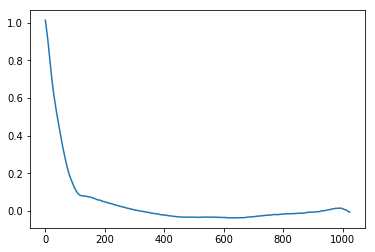

In [58]:
plt.plot(mcorr)

In [55]:
corrs[:,0]

array([1.38653746, 0.81895202, 0.85790164, 0.77260418, 0.70068276,
       0.93445856, 0.90629344, 0.75978953, 0.93548867, 0.88939467,
       0.71287686, 1.06358341, 0.96263797, 0.8891659 , 0.84500214,
       1.53700538, 1.08540622, 1.33071619, 0.9241251 , 1.39141853,
       0.93820863, 1.20639355, 1.02672258, 0.82759196, 1.08445493,
       0.69561104, 1.22910391, 0.72130707, 1.83327235, 0.6230312 ,
       0.72667926, 0.8380314 , 0.82603853, 0.64016708, 0.7355921 ,
       0.70387754, 0.61790841, 1.16304564, 1.28055369, 0.90537294,
       2.19678953, 1.40424898, 0.7819107 , 1.37513301, 1.02072971,
       0.82382341, 0.84916698, 1.25539324, 0.56203523, 0.96046798,
       1.20274336, 1.30230826, 1.01109125, 1.23262288, 0.82215573,
       1.18893506, 0.75492687, 1.12799257, 0.66964025, 0.97779669,
       0.74480961, 1.45214287, 0.63355294, 0.96640359, 1.27853302,
       0.75120726, 0.95742683, 1.00700943, 1.26712858, 1.77732057,
       0.81398193, 1.4166484 , 0.92351043, 0.84735411, 0.79468

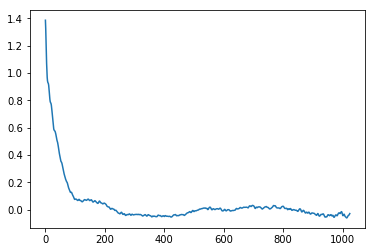

In [56]:
plt.plot(corrs[0,:])